In [1]:
import time
import odrive
from odrive.enums import *
import matplotlib.pyplot as plt

print("Finding odrv...")
odrv0 = odrive.find_any()

# print(INPUT_MODE_POS_FILTER) # 3
# print(INPUT_MODE_TRAP_TRAJ) # 5
# print(CONTROL_MODE_VELOCITY_CONTROL) # 2
# print(INPUT_MODE_VEL_RAMP) # 2 
# print(CONTROL_MODE_TORQUE_CONTROL) # 1

Finding odrv...


In [2]:
# ZERO
time.sleep(1)
pos = odrv0.axis1.controller.input_pos
print("Setting back to zero pos...")
while pos < 0:
    pos += 0.01
    odrv0.axis1.controller.input_pos = pos
    time.sleep(0.01)
odrv0.axis1.controller.input_pos = 0
time.sleep(1)

Setting back to zero pos...


In [48]:
import math
TIME_STEP = 0.01
GOAL_ANGULAR_VEL = 2

if odrv0.axis1.controller.input_pos != 0:
    raise Exception("Non-zero starting position, please re-zero!")

position_history = []
power_history = []
current_history = []
velocity_history = []

time_taken = 0
while pos < 2:
    pos += (180 * GOAL_ANGULAR_VEL * TIME_STEP) / (36 * math.pi)
    odrv0.axis1.controller.input_pos = -1 * pos
    position_history.append(odrv0.axis1.controller.input_pos)
    power_history.append(odrv0.axis1.controller.mechanical_power)
    velocity_history.append(odrv0.axis1.encoder.vel_estimate)
    time.sleep(TIME_STEP)
    time_taken += TIME_STEP

print(odrv0.axis1.controller.input_pos)

-2.0102593898773193


0.6300000000000003


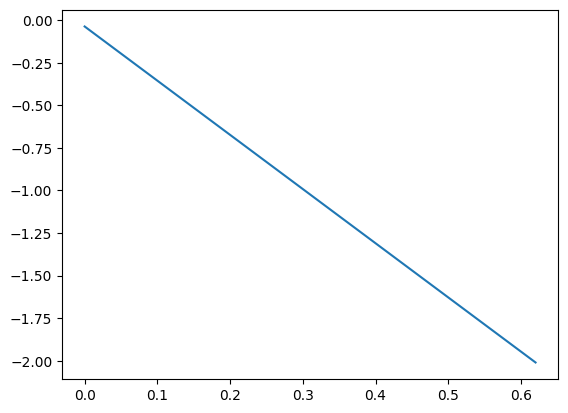

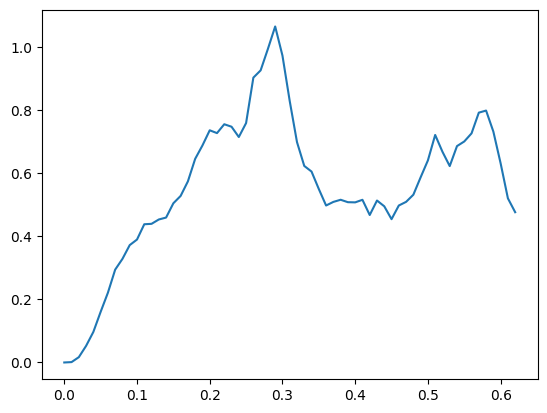

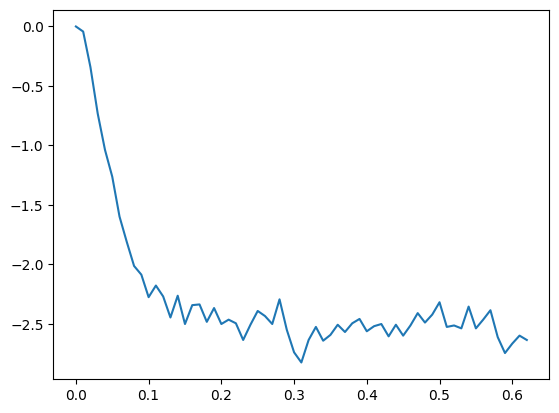

In [49]:
import numpy as np
print(time_taken)
x = np.arange(0, round(time_taken, 4), TIME_STEP)
plt.plot(x, position_history)
plt.show()
x = np.arange(0, round(time_taken, 4), TIME_STEP)
plt.plot(x, power_history)
plt.show()
x = np.arange(0, round(time_taken, 4), TIME_STEP)
plt.plot(x, velocity_history)
plt.show()

In [12]:
"""
Does "hard-jerk" moving to a certain point
# odrv0.axis1.controller.config.input_mode = INPUT_MODE_PASSTHROUGH
# odrv0.axis1.controller.config.control_mode = CONTROL_MODE_POSITION_CONTROL
"""
# ==============================
"""
Does "smooth" moving to a certain point
# odrv0.axis1.controller.config.input_mode = INPUT_MODE_POS_FILTER
# odrv0.axis1.controller.config.control_mode = CONTROL_MODE_POSITION_CONTROL
"""
# ==============================

In [4]:
def turn_motor_short(time_duration=5, direction="ccw"):
    odrv0.axis1.controller.config.input_mode = INPUT_MODE_PASSTHROUGH
    odrv0.axis1.controller.config.control_mode = CONTROL_MODE_VELOCITY_CONTROL
    multiplier = 1
    if direction == "cw":
        multiplier *= -1 
    input_velocity = multiplier * 4 # (n / 10) turns / second(in terms of actuator's output)
    turn_period = time_duration # in terms of seconds

    odrv0.axis1.controller.input_vel = 0
    time.sleep(1)
    odrv0.axis1.controller.input_vel = input_velocity
    print(odrv0.axis1.controller.vel_setpoint)
    # print(odrv0.axis1.encoder.pos_estimate)
    time.sleep(turn_period) # allowed to rotate for this .sleep(x) amount of time at above's input velocity
    odrv0.axis1.controller.input_vel = 0
    return True
turn_motor_short(direction="ccw")

4.0


True

In [3]:
def lifting():
    odrv0.axis1.controller.config.control_mode = CONTROL_MODE_POSITION_CONTROL
    odrv0.axis1.controller.config.input_mode = INPUT_MODE_TRAP_TRAJ 
    odrv0.axis1.controller.move_incremental(-2, True)
    time.sleep(5)
    odrv0.axis1.controller.move_incremental(2, True)
lifting()

In [6]:
odrv0.axis1.requested_state = AXIS_STATE_IDLE

Average I: 0.8465063638687134


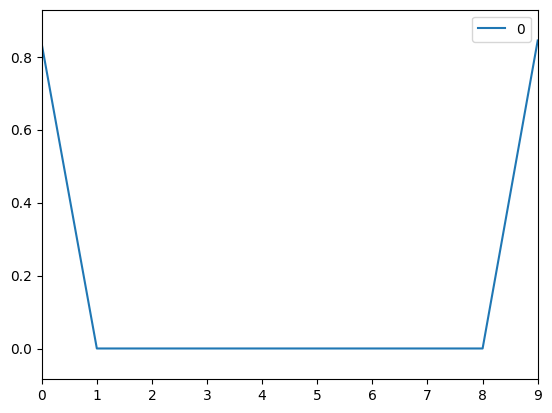

In [153]:
from odrive.utils import start_liveplotter
start_liveplotter(lambda: [odrv0.axis1.motor.current_control.Iq_measured])
avg_I = 0
for i in range(1000):
    avg_I += odrv0.axis1.motor.current_control.Iq_measured
print(f"Average I: {avg_I / 1000}")